<a href="https://colab.research.google.com/github/duke-sunshine/NYU_Econometrics_Summer2021/blob/main/Econometrics_Milestone3_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

[Data Metrics](https://github.com/coinmetrics-io/data/blob/master/csv/metrics.csv)

In [ ]:
import pandas as pd
import numpy as np

### import the data for Ethereum 

In [ ]:
df_eth=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/eth.csv")
df_eth.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2015-07-30,9206.0,5685.0,9203.0,9203.0,1237.0,9151.0,9203.0,145.0,8094.0,9203.0,9203.0,9203.0,9203.0,7952.0,122.0,9142.0,1017.0,9203.0,5363.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6911.0,643.886124,NaN,NaN,NaN,NaN,NaN,0.0,3.382792e+11,1.213355e+11,...,7.204905e+07,7.204930e+07,4.050941e+07,7.201769e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204898e+07,7.200534e+07,3.853810e+07,5.890308e+07,7.102484e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.793308e+07,3.553810e+07,7.204930e+07,4.471633e+08,7.123930e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2015-07-31,424.0,5692.0,9359.0,9359.0,1238.0,9278.0,9359.0,145.0,8152.0,9359.0,9359.0,9359.0,9359.0,8003.0,122.0,9271.0,1018.0,9359.0,5368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6863.0,582.027976,NaN,NaN,NaN,NaN,NaN,0.0,8.231927e+11,6.029419e+11,...,7.208510e+07,7.208549e+07,4.050941e+07,7.205138e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208504e+07,7.203841e+07,3.853810e+07,5.891693e+07,7.104616e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.808693e+07,3.563810e+07,7.208549e+07,2.721499e+08,7.127549e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2015-08-01,413.0,5699.0,9474.0,9474.0,1238.0,9368.0,9474.0,145.0,8188.0,9474.0,9474.0,9474.0,9474.0,8030.0,122.0,9360.0,1019.0,9474.0,5370.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5293.0,575.164179,NaN,NaN,NaN,NaN,NaN,0.0,9.566506e+11,8.872542e+11,...,7.211269e+07,7.211320e+07,4.050941e+07,7.207721e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211262e+07,7.206358e+07,3.853810e+07,5.893198e+07,7.106000e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.821198e+07,3.573810e+07,7.211320e+07,2.257182e+08,7.130320e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2015-08-02,432.0,5708.0,9561.0,9561.0,1238.0,9456.0,9561.0,145.0,8223.0,9561.0,9561.0,9561.0,9561.0,8051.0,122.0,9443.0,1019.0,9561.0,5381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5358.0,580.878686,NaN,NaN,NaN,NaN,NaN,0.0,1.102546e+12,1.020254e+12,...,7.214092e+07,7.214142e+07,4.050941e+07,7.210380e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214080e+07,7.208884e+07,3.853810e+07,5.893877e+07,7.108533e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.830877e+07,3.583810e+07,7.214142e+07,2.100940e+08,7.133142e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2015-08-03,444.0,5715.0,9637.0,9637.0,1237.0,9520.0,9637.0,145.0,8262.0,9637.0,9637.0,9637.0,9637.0,8078.0,122.0,9508.0,1019.0,9637.0,5382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5280.0,587.112311,NaN,NaN,NaN,NaN,NaN,0.0,1.154732e+12,1.125837e+12,...,7.216883e+07,7.216940e+07,4.050941e+07,7.213076e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216873e+07,7.211491e+07,3.853810e+07,5.8944

In [ ]:
df_eth['Type'] = 'eth'
df_eth.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type
0,2015-07-30,9206.0,5685.0,9203.0,9203.0,1237.0,9151.0,9203.0,145.0,8094.0,9203.0,9203.0,9203.0,9203.0,7952.0,122.0,9142.0,1017.0,9203.0,5363.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6911.0,643.886124,NaN,NaN,NaN,NaN,NaN,0.0,3.382792e+11,1.213355e+11,...,7.204930e+07,4.050941e+07,7.201769e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204898e+07,7.200534e+07,3.853810e+07,5.890308e+07,7.102484e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.793308e+07,3.553810e+07,7.204930e+07,4.471633e+08,7.123930e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
1,2015-07-31,424.0,5692.0,9359.0,9359.0,1238.0,9278.0,9359.0,145.0,8152.0,9359.0,9359.0,9359.0,9359.0,8003.0,122.0,9271.0,1018.0,9359.0,5368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6863.0,582.027976,NaN,NaN,NaN,NaN,NaN,0.0,8.231927e+11,6.029419e+11,...,7.208549e+07,4.050941e+07,7.205138e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208504e+07,7.203841e+07,3.853810e+07,5.891693e+07,7.104616e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.808693e+07,3.563810e+07,7.208549e+07,2.721499e+08,7.127549e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
2,2015-08-01,413.0,5699.0,9474.0,9474.0,1238.0,9368.0,9474.0,145.0,8188.0,9474.0,9474.0,9474.0,9474.0,8030.0,122.0,9360.0,1019.0,9474.0,5370.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5293.0,575.164179,NaN,NaN,NaN,NaN,NaN,0.0,9.566506e+11,8.872542e+11,...,7.211320e+07,4.050941e+07,7.207721e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211262e+07,7.206358e+07,3.853810e+07,5.893198e+07,7.106000e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.821198e+07,3.573810e+07,7.211320e+07,2.257182e+08,7.130320e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
3,2015-08-02,432.0,5708.0,9561.0,9561.0,1238.0,9456.0,9561.0,145.0,8223.0,9561.0,9561.0,9561.0,9561.0,8051.0,122.0,9443.0,1019.0,9561.0,5381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5358.0,580.878686,NaN,NaN,NaN,NaN,NaN,0.0,1.102546e+12,1.020254e+12,...,7.214142e+07,4.050941e+07,7.210380e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214080e+07,7.208884e+07,3.853810e+07,5.893877e+07,7.108533e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.830877e+07,3.583810e+07,7.214142e+07,2.100940e+08,7.133142e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
4,2015-08-03,444.0,5715.0,9637.0,9637.0,1237.0,9520.0,9637.0,145.0,8262.0,9637.0,9637.0,9637.0,9637.0,8078.0,122.0,9508.0,1019.0,9637.0,5382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5280.0,587.112311,NaN,NaN,NaN,NaN,NaN,0.0,1.154732e+12,1.125837e+12,...,7.216940e+07,4.050941e+07,7.213076e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216873e+07,7.211491e+07,3.853810e+07,5.894429e+07,7.110134e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Import the Data for Ethereum Classic

In [ ]:
df_etc=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/etc.csv")
df_etc.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2016-07-20,21680.0,5491.0,63999.0,139156.0,956.0,34371.0,90814.0,102.0,15524.0,251206.0,168782.0,135046.0,86861.0,14239.0,88.0,32387.0,831.0,59113.0,4966.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,3591.0,2011.762462,NaN,NaN,NaN,NaN,NaN,NaN,1.093854e+13,5.860014e+13,...,8.208438e+07,8.216821e+07,4.973673e+07,8.152539e+07,8.216977e+07,8.216965e+07,8.216783e+07,8.215578e+07,8.206606e+07,8.140725e+07,4.845869e+07,6.689327e+07,7.844824e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.956878e+07,8.195765e+07,7.470971e+07,8.216978e+07,1.372007e+08,1.081479e+07,37562.0,0.434745,30374.0,1.840795e+07,NaN,899.502488,NaN,1.000024,NaN,0.332500,NaN,NaN
1,2016-07-21,17037.0,5471.0,64419.0,140717.0,960.0,34392.0,91580.0,103.0,15515.0,252849.0,170404.0,136632.0,87615.0,14229.0,88.0,32394.0,832.0,59515.0,4954.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,1799.0,2837.280712,NaN,NaN,NaN,NaN,NaN,NaN,5.616330e+11,1.271276e+12,...,8.209269e+07,8.217744e+07,4.972084e+07,8.153163e+07,8.217903e+07,8.217892e+07,8.217706e+07,8.216489e+07,8.207422e+07,8.141345e+07,4.835555e+07,6.692544e+07,7.845158e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.946770e+07,8.196906e+07,7.477675e+07,8.217905e+07,1.223244e+08,1.323342e+07,30035.0,0.347627,24992.0,7.504155e+05,NaN,34.523939,NaN,0.192971,NaN,0.342962,NaN,NaN
2,2016-07-22,13208.0,5497.0,64617.0,140936.0,960.0,34619.0,91833.0,101.0,15622.0,253504.0,170681.0,136840.0,87836.0,14338.0,87.0,32635.0,834.0,59684.0,4970.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,5669.0,1107.125066,NaN,NaN,NaN,NaN,NaN,NaN,4.402919e+11,4.862804e+11,...,8.212352e+07,8.220802e+07,4.947728e+07,8.155725e+07,8.220962e+07,8.220950e+07,8.220765e+07,8.219544e+07,8.210517e+07,8.143916e+07,4.819902e+07,6.686495e+07,7.844524e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.939334e+07,8.199628e+07,7.475535e+07,8.220963e+07,1.306924e+08,1.408255e+07,19557.0,0.226354,15504.0,1.642068e+06,NaN,105.987807,NaN,0.268690,NaN,0.362823,NaN,NaN
3,2016-07-23,9838.0,5499.0,64505.0,140990.0,960.0,34529.0,91857.0,103.0,15600.0,254059.0,170946.0,136895.0,87753.0,14331.0,87.0,32561.0,831.0,59584.0,4975.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,5503.0,961.825186,NaN,NaN,NaN,NaN,NaN,NaN,3.099510e+11,3.716707e+11,...,8.215335e+07,8.223768e+07,4.971997e+07,8.158876e+07,8.223928e+07,8.223916e+07,8.223729e+07,8.222508e+07,8.213515e+07,8.147199e+07,4.826322e+07,6.685387e+07,7.847848e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.946897e+07,8.202888e+07,7.478552e+07,8.223929e+07,1.359277e+08,1.815243e+07,14304.0,0.165556,10534.0,4.321988e+06,NaN,414.256390,NaN,0.112851,NaN,0.415754,NaN,NaN
4,2016-07-24,14910.0,5304.0,62722.0,138707.0,910.0,33629.0,89679.0,98.0,15048.0,255994.0,170788.0,134572.0,85580.0,13809.0,83.0,31706.0,781.0,57745.0,4800.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61

In [ ]:
### change to dateime
df_eth['time']=pd.to_datetime(df_eth['time'])
df_eth.dtypes

time                datetime64[ns]
AdrActCnt                  float64
AdrBal1in100KCnt           float64
AdrBal1in100MCnt           float64
AdrBal1in10BCnt            float64
                         ...      
TxTfrValMedUSD             float64
VelCur1yr                  float64
VtyDayRet180d              float64
VtyDayRet30d               float64
Type                        object
Length: 140, dtype: object

In [ ]:
df_etc['Type'] = 'etc'
df_etc.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type
0,2016-07-20,21680.0,5491.0,63999.0,139156.0,956.0,34371.0,90814.0,102.0,15524.0,251206.0,168782.0,135046.0,86861.0,14239.0,88.0,32387.0,831.0,59113.0,4966.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,3591.0,2011.762462,NaN,NaN,NaN,NaN,NaN,NaN,1.093854e+13,5.860014e+13,...,8.216821e+07,4.973673e+07,8.152539e+07,8.216977e+07,8.216965e+07,8.216783e+07,8.215578e+07,8.206606e+07,8.140725e+07,4.845869e+07,6.689327e+07,7.844824e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.956878e+07,8.195765e+07,7.470971e+07,8.216978e+07,1.372007e+08,1.081479e+07,37562.0,0.434745,30374.0,1.840795e+07,NaN,899.502488,NaN,1.000024,NaN,0.332500,NaN,NaN,etc
1,2016-07-21,17037.0,5471.0,64419.0,140717.0,960.0,34392.0,91580.0,103.0,15515.0,252849.0,170404.0,136632.0,87615.0,14229.0,88.0,32394.0,832.0,59515.0,4954.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,1799.0,2837.280712,NaN,NaN,NaN,NaN,NaN,NaN,5.616330e+11,1.271276e+12,...,8.217744e+07,4.972084e+07,8.153163e+07,8.217903e+07,8.217892e+07,8.217706e+07,8.216489e+07,8.207422e+07,8.141345e+07,4.835555e+07,6.692544e+07,7.845158e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.946770e+07,8.196906e+07,7.477675e+07,8.217905e+07,1.223244e+08,1.323342e+07,30035.0,0.347627,24992.0,7.504155e+05,NaN,34.523939,NaN,0.192971,NaN,0.342962,NaN,NaN,etc
2,2016-07-22,13208.0,5497.0,64617.0,140936.0,960.0,34619.0,91833.0,101.0,15622.0,253504.0,170681.0,136840.0,87836.0,14338.0,87.0,32635.0,834.0,59684.0,4970.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,5669.0,1107.125066,NaN,NaN,NaN,NaN,NaN,NaN,4.402919e+11,4.862804e+11,...,8.220802e+07,4.947728e+07,8.155725e+07,8.220962e+07,8.220950e+07,8.220765e+07,8.219544e+07,8.210517e+07,8.143916e+07,4.819902e+07,6.686495e+07,7.844524e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.939334e+07,8.199628e+07,7.475535e+07,8.220963e+07,1.306924e+08,1.408255e+07,19557.0,0.226354,15504.0,1.642068e+06,NaN,105.987807,NaN,0.268690,NaN,0.362823,NaN,NaN,etc
3,2016-07-23,9838.0,5499.0,64505.0,140990.0,960.0,34529.0,91857.0,103.0,15600.0,254059.0,170946.0,136895.0,87753.0,14331.0,87.0,32561.0,831.0,59584.0,4975.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,5503.0,961.825186,NaN,NaN,NaN,NaN,NaN,NaN,3.099510e+11,3.716707e+11,...,8.223768e+07,4.971997e+07,8.158876e+07,8.223928e+07,8.223916e+07,8.223729e+07,8.222508e+07,8.213515e+07,8.147199e+07,4.826322e+07,6.685387e+07,7.847848e+07,2.895121e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.946897e+07,8.202888e+07,7.478552e+07,8.223929e+07,1.359277e+08,1.815243e+07,14304.0,0.165556,10534.0,4.321988e+06,NaN,414.256390,NaN,0.112851,NaN,0.415754,NaN,NaN,etc
4,2016-07-24,14910.0,5304.0,62722.0,138707.0,910.0,33629.0,89679.0,98.0,15048.0,255994.0,170788.0,134572.0,85580.0,13809.0,83.0,31706.0,781.0,57745.0,4800.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611240e+09,9388.0,1010.318705,NaN,NaN,NaN,NaN,NaN,

In [ ]:
### change to dateime
df_etc['time']=pd.to_datetime(df_etc['time'])
df_etc.dtypes

time                datetime64[ns]
AdrActCnt                  float64
AdrBal1in100KCnt           float64
AdrBal1in100MCnt           float64
AdrBal1in10BCnt            float64
                         ...      
TxTfrValMedUSD             float64
VelCur1yr                  float64
VtyDayRet180d              float64
VtyDayRet30d               float64
Type                        object
Length: 135, dtype: object

In [ ]:
df =pd.concat([df_eth, df_etc], ignore_index=True)
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type
0,2015-07-30,9206.0,5685.0,9203.0,9203.0,1237.0,9151.0,9203.0,145.0,8094.0,9203.0,9203.0,9203.0,9203.0,7952.0,122.0,9142.0,1017.0,9203.0,5363.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6911.0,643.886124,NaN,NaN,NaN,NaN,NaN,0.0,3.382792e+11,1.213355e+11,...,7.204930e+07,4.050941e+07,7.201769e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204898e+07,7.200534e+07,3.853810e+07,5.890308e+07,7.102484e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.793308e+07,3.553810e+07,7.204930e+07,4.471633e+08,7.123930e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
1,2015-07-31,424.0,5692.0,9359.0,9359.0,1238.0,9278.0,9359.0,145.0,8152.0,9359.0,9359.0,9359.0,9359.0,8003.0,122.0,9271.0,1018.0,9359.0,5368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6863.0,582.027976,NaN,NaN,NaN,NaN,NaN,0.0,8.231927e+11,6.029419e+11,...,7.208549e+07,4.050941e+07,7.205138e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208504e+07,7.203841e+07,3.853810e+07,5.891693e+07,7.104616e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.808693e+07,3.563810e+07,7.208549e+07,2.721499e+08,7.127549e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
2,2015-08-01,413.0,5699.0,9474.0,9474.0,1238.0,9368.0,9474.0,145.0,8188.0,9474.0,9474.0,9474.0,9474.0,8030.0,122.0,9360.0,1019.0,9474.0,5370.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5293.0,575.164179,NaN,NaN,NaN,NaN,NaN,0.0,9.566506e+11,8.872542e+11,...,7.211320e+07,4.050941e+07,7.207721e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211262e+07,7.206358e+07,3.853810e+07,5.893198e+07,7.106000e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.821198e+07,3.573810e+07,7.211320e+07,2.257182e+08,7.130320e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
3,2015-08-02,432.0,5708.0,9561.0,9561.0,1238.0,9456.0,9561.0,145.0,8223.0,9561.0,9561.0,9561.0,9561.0,8051.0,122.0,9443.0,1019.0,9561.0,5381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5358.0,580.878686,NaN,NaN,NaN,NaN,NaN,0.0,1.102546e+12,1.020254e+12,...,7.214142e+07,4.050941e+07,7.210380e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214080e+07,7.208884e+07,3.853810e+07,5.893877e+07,7.108533e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.830877e+07,3.583810e+07,7.214142e+07,2.100940e+08,7.133142e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,eth
4,2015-08-03,444.0,5715.0,9637.0,9637.0,1237.0,9520.0,9637.0,145.0,8262.0,9637.0,9637.0,9637.0,9637.0,8078.0,122.0,9508.0,1019.0,9637.0,5382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5280.0,587.112311,NaN,NaN,NaN,NaN,NaN,0.0,1.154732e+12,1.125837e+12,...,7.216940e+07,4.050941e+07,7.213076e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216873e+07,7.211491e+07,3.853810e+07,5.894429e+07,7.110134e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.tail()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type
3919,2021-06-03,31568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6388.0,1633.790388,NaN,NaN,NaN,NaN,NaN,NaN,3.778735e+14,3.557380e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59566.0,0.689421,59512.0,2.456729e+06,1.717539e+08,41.398020,2894.203292,0.265808,18.583047,NaN,0.098549,0.154010,etc
3920,2021-06-04,31751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6270.0,1732.893461,NaN,NaN,NaN,NaN,NaN,NaN,3.636853e+14,3.635655e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62870.0,0.727662,61485.0,3.299304e+06,2.146703e+08,53.762605,3498.082504,0.320961,20.883418,NaN,0.098747,0.143614,etc
3921,2021-06-05,29345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6375.0,1552.179137,NaN,NaN,NaN,NaN,NaN,NaN,3.711644e+14,3.641131e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55935.0,0.647396,56403.0,9.572153e+05,6.015246e+07,16.990078,1067.675211,0.289157,18.170954,NaN,0.098804,0.126066,etc
3922,2021-06-06,29411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6256.0,1538.636189,NaN,NaN,NaN,NaN,NaN,NaN,3.605640e+14,3.702750e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54035.0,0.625405,54577.0,6.268467e+05,4.009361e+07,11.501158,735.623197,0.284823,18.217482,NaN,0.098641,0.125035,etc
3923,2021-06-07,28820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6340.0,1600.207256,NaN,NaN,NaN,NaN,NaN,NaN,3.626442e+14,3.586696e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55891.0,0.646887,54176.0,1.588664e+06,9.245453e+07,29.406180,1711.333563,0.289440,16.844343,NaN,0.098923,0.124858,etc


In [ ]:
df=df.dropna()
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type
374,2016-08-07,20085.0,5715.0,63586.0,142351.0,1119.0,34264.0,89763.0,112.0,15656.0,284716.0,183411.0,137945.0,85959.0,14512.0,102.0,32288.0,955.0,58819.0,5202.0,6.0,33379.0,1050.0,62535.0,5505.0,7.0,88724.0,15187.0,109.0,1.614335e+09,6077.0,1473.190061,6.846379e+08,1.337273,1.298168,9.122719e+08,8.855948e+08,6.821883e+08,5.419601e+13,5.357778e+13,...,8.275672e+07,4.747398e+07,8.212375e+07,8.275849e+07,8.275834e+07,8.275636e+07,8.274452e+07,8.265425e+07,8.201801e+07,4.655234e+07,6.666224e+07,7.903920e+07,2.177983e+07,8.275663e+07,8.274815e+07,8.266481e+07,6.757445e+07,7.933283e+07,2.277974e+07,8.208302e+07,4.721670e+07,4.635234e+07,8.260966e+07,7.548060e+07,8.275851e+07,2.001159e+08,8.033844e+07,42955.0,0.497164,51113.0,1.975374e+06,2.177514e+07,62.183892,685.471741,1.001421,11.038961,7.024621,0.084586,0.091806,eth
375,2016-08-08,20439.0,5738.0,63125.0,142645.0,1118.0,34108.0,89944.0,111.0,15683.0,286043.0,184321.0,138215.0,85504.0,14551.0,99.0,32186.0,956.0,58357.0,5228.0,6.0,33604.0,1074.0,62503.0,5610.0,7.0,89468.0,15370.0,107.0,1.614335e+09,6059.0,1503.805248,7.039976e+08,1.361708,1.321812,9.363531e+08,9.089198e+08,6.876314e+08,5.517396e+13,5.481020e+13,...,8.278890e+07,4.738010e+07,8.216045e+07,8.279066e+07,8.279052e+07,8.278847e+07,8.277663e+07,8.268812e+07,8.205566e+07,4.626887e+07,6.666584e+07,7.906737e+07,2.175420e+07,8.278886e+07,8.278065e+07,8.270161e+07,6.778311e+07,7.943212e+07,2.275411e+07,8.213364e+07,4.703313e+07,4.636887e+07,8.264695e+07,7.549871e+07,8.279068e+07,2.004580e+08,8.036508e+07,42984.0,0.497500,75328.0,1.996075e+06,2.257538e+07,39.049717,441.647804,0.147550,1.668772,7.043333,0.084186,0.091690,eth
376,2016-08-09,22799.0,5761.0,63473.0,143324.0,1132.0,34243.0,89909.0,108.0,15757.0,288592.0,185755.0,138880.0,85980.0,14605.0,98.0,32353.0,969.0,58644.0,5250.0,7.0,34398.0,1141.0,63624.0,5793.0,8.0,90027.0,15865.0,108.0,1.614335e+09,6130.0,1591.826101,7.684484e+08,1.442372,1.400130,1.019313e+09,9.894610e+08,7.066921e+08,5.857436e+13,5.675474e+13,...,8.282154e+07,4.703375e+07,8.218965e+07,8.282333e+07,8.282318e+07,8.282117e+07,8.280924e+07,8.272078e+07,8.208311e+07,4.609721e+07,6.668005e+07,7.908925e+07,2.260947e+07,8.282155e+07,8.281397e+07,8.273957e+07,6.826293e+07,7.959072e+07,2.350906e+07,8.219851e+07,4.703375e+07,4.629721e+07,8.268094e+07,7.554164e+07,8.282335e+07,2.011982e+08,8.039774e+07,47057.0,0.544641,55293.0,3.565106e+06,4.387603e+07,100.900193,1241.786121,1.003216,12.346657,7.087723,0.081587,0.092947,eth
377,2016-08-10,21183.0,5817.0,63917.0,143945.0,1146.0,34615.0,90336.0,112.0,15933.0,290469.0,187008.0,139486.0,86456.0,14756.0,101.0,32696.0,986.0,59119.0,5295.0,6.0,34633.0,1148.0,63942.0,5818.0,6.0,90347.0,15947.0,112.0,1.614335e+09,6054.0,1606.787578,7.585355e+08,1.405556,1.364333,1.002104e+09,9.727134e+08,7.129590e+08,5.931024e+13,5.885967e+13,...,8.285370

# Dummy Variables

https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

In [ ]:
df['eth']=df['Type'].apply(lambda x: 1 if x=='eth' else 0)
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type,eth
374,2016-08-07,20085.0,5715.0,63586.0,142351.0,1119.0,34264.0,89763.0,112.0,15656.0,284716.0,183411.0,137945.0,85959.0,14512.0,102.0,32288.0,955.0,58819.0,5202.0,6.0,33379.0,1050.0,62535.0,5505.0,7.0,88724.0,15187.0,109.0,1.614335e+09,6077.0,1473.190061,6.846379e+08,1.337273,1.298168,9.122719e+08,8.855948e+08,6.821883e+08,5.419601e+13,5.357778e+13,...,4.747398e+07,8.212375e+07,8.275849e+07,8.275834e+07,8.275636e+07,8.274452e+07,8.265425e+07,8.201801e+07,4.655234e+07,6.666224e+07,7.903920e+07,2.177983e+07,8.275663e+07,8.274815e+07,8.266481e+07,6.757445e+07,7.933283e+07,2.277974e+07,8.208302e+07,4.721670e+07,4.635234e+07,8.260966e+07,7.548060e+07,8.275851e+07,2.001159e+08,8.033844e+07,42955.0,0.497164,51113.0,1.975374e+06,2.177514e+07,62.183892,685.471741,1.001421,11.038961,7.024621,0.084586,0.091806,eth,1
375,2016-08-08,20439.0,5738.0,63125.0,142645.0,1118.0,34108.0,89944.0,111.0,15683.0,286043.0,184321.0,138215.0,85504.0,14551.0,99.0,32186.0,956.0,58357.0,5228.0,6.0,33604.0,1074.0,62503.0,5610.0,7.0,89468.0,15370.0,107.0,1.614335e+09,6059.0,1503.805248,7.039976e+08,1.361708,1.321812,9.363531e+08,9.089198e+08,6.876314e+08,5.517396e+13,5.481020e+13,...,4.738010e+07,8.216045e+07,8.279066e+07,8.279052e+07,8.278847e+07,8.277663e+07,8.268812e+07,8.205566e+07,4.626887e+07,6.666584e+07,7.906737e+07,2.175420e+07,8.278886e+07,8.278065e+07,8.270161e+07,6.778311e+07,7.943212e+07,2.275411e+07,8.213364e+07,4.703313e+07,4.636887e+07,8.264695e+07,7.549871e+07,8.279068e+07,2.004580e+08,8.036508e+07,42984.0,0.497500,75328.0,1.996075e+06,2.257538e+07,39.049717,441.647804,0.147550,1.668772,7.043333,0.084186,0.091690,eth,1
376,2016-08-09,22799.0,5761.0,63473.0,143324.0,1132.0,34243.0,89909.0,108.0,15757.0,288592.0,185755.0,138880.0,85980.0,14605.0,98.0,32353.0,969.0,58644.0,5250.0,7.0,34398.0,1141.0,63624.0,5793.0,8.0,90027.0,15865.0,108.0,1.614335e+09,6130.0,1591.826101,7.684484e+08,1.442372,1.400130,1.019313e+09,9.894610e+08,7.066921e+08,5.857436e+13,5.675474e+13,...,4.703375e+07,8.218965e+07,8.282333e+07,8.282318e+07,8.282117e+07,8.280924e+07,8.272078e+07,8.208311e+07,4.609721e+07,6.668005e+07,7.908925e+07,2.260947e+07,8.282155e+07,8.281397e+07,8.273957e+07,6.826293e+07,7.959072e+07,2.350906e+07,8.219851e+07,4.703375e+07,4.629721e+07,8.268094e+07,7.554164e+07,8.282335e+07,2.011982e+08,8.039774e+07,47057.0,0.544641,55293.0,3.565106e+06,4.387603e+07,100.900193,1241.786121,1.003216,12.346657,7.087723,0.081587,0.092947,eth,1
377,2016-08-10,21183.0,5817.0,63917.0,143945.0,1146.0,34615.0,90336.0,112.0,15933.0,290469.0,187008.0,139486.0,86456.0,14756.0,101.0,32696.0,986.0,59119.0,5295.0,6.0,34633.0,1148.0,63942.0,5818.0,6.0,90347.0,15947.0,112.0,1.614335e+09,6054.0,1606.787578,7.585355e+08,1.405556,1.364333,1.002104e+09,9.727134e+08,7.129590e+08,5.931024e+13,5.885967e+13,...,4.676137e+07,8.221677e+07,8.285549e+07,8.285534e+07,8

In [ ]:
df['eth']=df['Type'].apply(lambda x: 1 if x=='eth' else 0)
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type,eth
374,2016-08-07,20085.0,5715.0,63586.0,142351.0,1119.0,34264.0,89763.0,112.0,15656.0,284716.0,183411.0,137945.0,85959.0,14512.0,102.0,32288.0,955.0,58819.0,5202.0,6.0,33379.0,1050.0,62535.0,5505.0,7.0,88724.0,15187.0,109.0,1.614335e+09,6077.0,1473.190061,6.846379e+08,1.337273,1.298168,9.122719e+08,8.855948e+08,6.821883e+08,5.419601e+13,5.357778e+13,...,4.747398e+07,8.212375e+07,8.275849e+07,8.275834e+07,8.275636e+07,8.274452e+07,8.265425e+07,8.201801e+07,4.655234e+07,6.666224e+07,7.903920e+07,2.177983e+07,8.275663e+07,8.274815e+07,8.266481e+07,6.757445e+07,7.933283e+07,2.277974e+07,8.208302e+07,4.721670e+07,4.635234e+07,8.260966e+07,7.548060e+07,8.275851e+07,2.001159e+08,8.033844e+07,42955.0,0.497164,51113.0,1.975374e+06,2.177514e+07,62.183892,685.471741,1.001421,11.038961,7.024621,0.084586,0.091806,eth,1
375,2016-08-08,20439.0,5738.0,63125.0,142645.0,1118.0,34108.0,89944.0,111.0,15683.0,286043.0,184321.0,138215.0,85504.0,14551.0,99.0,32186.0,956.0,58357.0,5228.0,6.0,33604.0,1074.0,62503.0,5610.0,7.0,89468.0,15370.0,107.0,1.614335e+09,6059.0,1503.805248,7.039976e+08,1.361708,1.321812,9.363531e+08,9.089198e+08,6.876314e+08,5.517396e+13,5.481020e+13,...,4.738010e+07,8.216045e+07,8.279066e+07,8.279052e+07,8.278847e+07,8.277663e+07,8.268812e+07,8.205566e+07,4.626887e+07,6.666584e+07,7.906737e+07,2.175420e+07,8.278886e+07,8.278065e+07,8.270161e+07,6.778311e+07,7.943212e+07,2.275411e+07,8.213364e+07,4.703313e+07,4.636887e+07,8.264695e+07,7.549871e+07,8.279068e+07,2.004580e+08,8.036508e+07,42984.0,0.497500,75328.0,1.996075e+06,2.257538e+07,39.049717,441.647804,0.147550,1.668772,7.043333,0.084186,0.091690,eth,1
376,2016-08-09,22799.0,5761.0,63473.0,143324.0,1132.0,34243.0,89909.0,108.0,15757.0,288592.0,185755.0,138880.0,85980.0,14605.0,98.0,32353.0,969.0,58644.0,5250.0,7.0,34398.0,1141.0,63624.0,5793.0,8.0,90027.0,15865.0,108.0,1.614335e+09,6130.0,1591.826101,7.684484e+08,1.442372,1.400130,1.019313e+09,9.894610e+08,7.066921e+08,5.857436e+13,5.675474e+13,...,4.703375e+07,8.218965e+07,8.282333e+07,8.282318e+07,8.282117e+07,8.280924e+07,8.272078e+07,8.208311e+07,4.609721e+07,6.668005e+07,7.908925e+07,2.260947e+07,8.282155e+07,8.281397e+07,8.273957e+07,6.826293e+07,7.959072e+07,2.350906e+07,8.219851e+07,4.703375e+07,4.629721e+07,8.268094e+07,7.554164e+07,8.282335e+07,2.011982e+08,8.039774e+07,47057.0,0.544641,55293.0,3.565106e+06,4.387603e+07,100.900193,1241.786121,1.003216,12.346657,7.087723,0.081587,0.092947,eth,1
377,2016-08-10,21183.0,5817.0,63917.0,143945.0,1146.0,34615.0,90336.0,112.0,15933.0,290469.0,187008.0,139486.0,86456.0,14756.0,101.0,32696.0,986.0,59119.0,5295.0,6.0,34633.0,1148.0,63942.0,5818.0,6.0,90347.0,15947.0,112.0,1.614335e+09,6054.0,1606.787578,7.585355e+08,1.405556,1.364333,1.002104e+09,9.727134e+08,7.129590e+08,5.931024e+13,5.885967e+13,...,4.676137e+07,8.221677e+07,8.285549e+07,8.285534e+07,8

In [ ]:
dummies = pd.get_dummies(df["Type"], drop_first=False)
df = pd.concat([df, dummies], axis=1)
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,Type,eth,eth
374,2016-08-07,20085.0,5715.0,63586.0,142351.0,1119.0,34264.0,89763.0,112.0,15656.0,284716.0,183411.0,137945.0,85959.0,14512.0,102.0,32288.0,955.0,58819.0,5202.0,6.0,33379.0,1050.0,62535.0,5505.0,7.0,88724.0,15187.0,109.0,1.614335e+09,6077.0,1473.190061,6.846379e+08,1.337273,1.298168,9.122719e+08,8.855948e+08,6.821883e+08,5.419601e+13,5.357778e+13,...,8.212375e+07,8.275849e+07,8.275834e+07,8.275636e+07,8.274452e+07,8.265425e+07,8.201801e+07,4.655234e+07,6.666224e+07,7.903920e+07,2.177983e+07,8.275663e+07,8.274815e+07,8.266481e+07,6.757445e+07,7.933283e+07,2.277974e+07,8.208302e+07,4.721670e+07,4.635234e+07,8.260966e+07,7.548060e+07,8.275851e+07,2.001159e+08,8.033844e+07,42955.0,0.497164,51113.0,1.975374e+06,2.177514e+07,62.183892,685.471741,1.001421,11.038961,7.024621,0.084586,0.091806,eth,1,1
375,2016-08-08,20439.0,5738.0,63125.0,142645.0,1118.0,34108.0,89944.0,111.0,15683.0,286043.0,184321.0,138215.0,85504.0,14551.0,99.0,32186.0,956.0,58357.0,5228.0,6.0,33604.0,1074.0,62503.0,5610.0,7.0,89468.0,15370.0,107.0,1.614335e+09,6059.0,1503.805248,7.039976e+08,1.361708,1.321812,9.363531e+08,9.089198e+08,6.876314e+08,5.517396e+13,5.481020e+13,...,8.216045e+07,8.279066e+07,8.279052e+07,8.278847e+07,8.277663e+07,8.268812e+07,8.205566e+07,4.626887e+07,6.666584e+07,7.906737e+07,2.175420e+07,8.278886e+07,8.278065e+07,8.270161e+07,6.778311e+07,7.943212e+07,2.275411e+07,8.213364e+07,4.703313e+07,4.636887e+07,8.264695e+07,7.549871e+07,8.279068e+07,2.004580e+08,8.036508e+07,42984.0,0.497500,75328.0,1.996075e+06,2.257538e+07,39.049717,441.647804,0.147550,1.668772,7.043333,0.084186,0.091690,eth,1,1
376,2016-08-09,22799.0,5761.0,63473.0,143324.0,1132.0,34243.0,89909.0,108.0,15757.0,288592.0,185755.0,138880.0,85980.0,14605.0,98.0,32353.0,969.0,58644.0,5250.0,7.0,34398.0,1141.0,63624.0,5793.0,8.0,90027.0,15865.0,108.0,1.614335e+09,6130.0,1591.826101,7.684484e+08,1.442372,1.400130,1.019313e+09,9.894610e+08,7.066921e+08,5.857436e+13,5.675474e+13,...,8.218965e+07,8.282333e+07,8.282318e+07,8.282117e+07,8.280924e+07,8.272078e+07,8.208311e+07,4.609721e+07,6.668005e+07,7.908925e+07,2.260947e+07,8.282155e+07,8.281397e+07,8.273957e+07,6.826293e+07,7.959072e+07,2.350906e+07,8.219851e+07,4.703375e+07,4.629721e+07,8.268094e+07,7.554164e+07,8.282335e+07,2.011982e+08,8.039774e+07,47057.0,0.544641,55293.0,3.565106e+06,4.387603e+07,100.900193,1241.786121,1.003216,12.346657,7.087723,0.081587,0.092947,eth,1,1
377,2016-08-10,21183.0,5817.0,63917.0,143945.0,1146.0,34615.0,90336.0,112.0,15933.0,290469.0,187008.0,139486.0,86456.0,14756.0,101.0,32696.0,986.0,59119.0,5295.0,6.0,34633.0,1148.0,63942.0,5818.0,6.0,90347.0,15947.0,112.0,1.614335e+09,6054.0,1606.787578,7.585355e+08,1.405556,1.364333,1.002104e+09,9.727134e+08,7.129590e+08,5.931024e+13,5.885967e+13,...,8.221677e+07,8.285549e+07,8.285534e+07,8.285333e+07,8.284141e+07,8.275243e+07,8.210796e+07,4.57294

# Ridge Regression

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://towardsdatascience.com/ridge-regression-python-example-f015345d936b

https://youtu.be/0yI0-r3Ly40

https://youtu.be/WatqxWFhcZk

## basics

In [ ]:
# define the dependent and independent variables
X=df[["TxTfrValAdjUSD","FlowOutExUSD","FeeMedUSD","RevUSD","GasLmtTxMean"]]
y=df['PriceUSD']

In [28]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
res_Ridge = reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.40647e-20): result may not be accurate.
  overwrite_a=True).T


In [29]:
reg.coef_

array([ 5.20759445e-09,  2.92992219e-08, -1.15223264e+02,  5.59184859e-05,
        4.47010907e-04])

In [30]:
reg.intercept_

-73.22945215510134

In [31]:
reg.get_params(deep=True)

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [32]:
reg.score(X,y)

0.9620706341999872

## cross validations

In [33]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

In [34]:
reg.fit(X,y)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [35]:
reg.alpha_

10.0

#The Lasso

https://scikit-learn.org/stable/modules/linear_model.html#lasso

In [38]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)

In [39]:
reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
reg.coef_

array([ 5.20808669e-09,  2.93698362e-08, -1.15159486e+02,  5.59057608e-05,
        4.46820566e-04])

In [41]:
reg.intercept_

-73.15449243378498

In [42]:
reg.get_params(deep=True)

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [43]:
reg.score(X,y)

0.9620706102572139

# Principal Component

https://www.statology.org/principal-components-regression-in-python/

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Text(0.5, 1.0, 'hp')

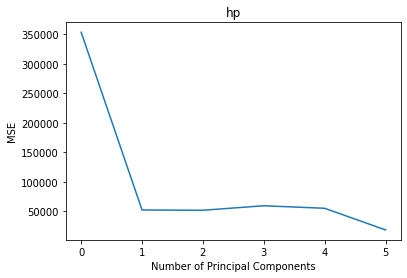

In [45]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [49]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 69.99,  89.34,  95.63,  99.14, 100.  ])

In [52]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


242.1459836209666